# Machine Learning

## DF, RF


In [1]:
## 기본 패키지 모음
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 전처리 및 모델링 준비를 위한 패키지
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

## 실제 모델링을 위한 패키지
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


## 모델 평가를 위한 패키지
from sklearn.metrics import classification_report
from sklearn import metrics

## 1. Data import

In [2]:
# Data import
wine = pd.read_csv('/content/winequality_red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
# 모두 숫자인것을 확인
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


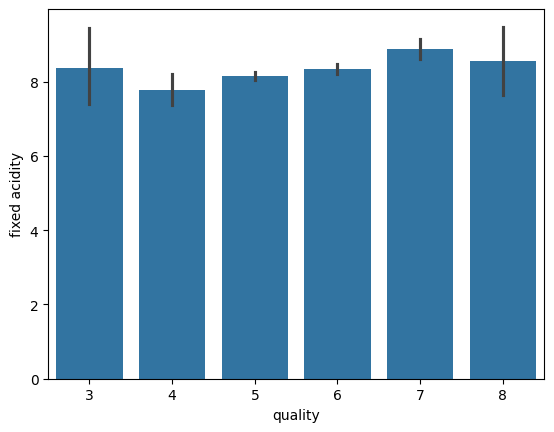

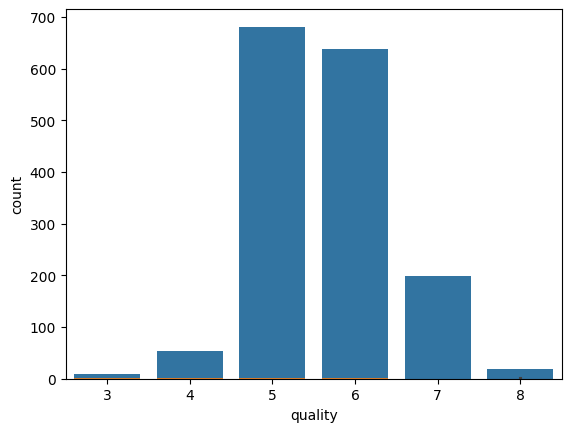

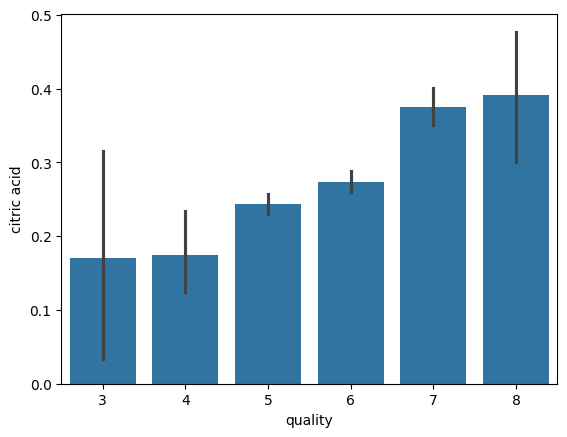

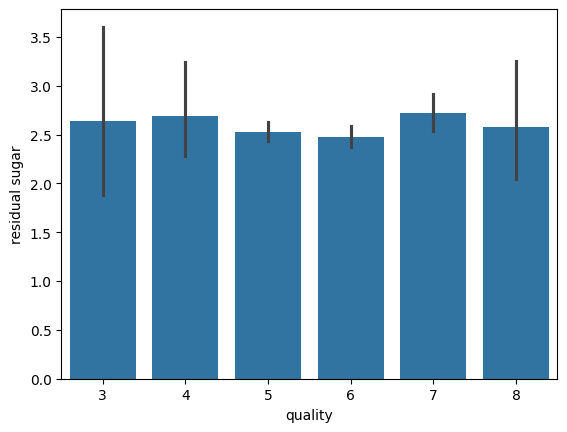

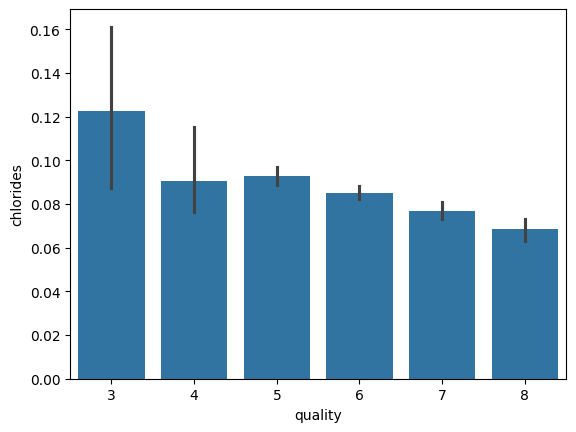

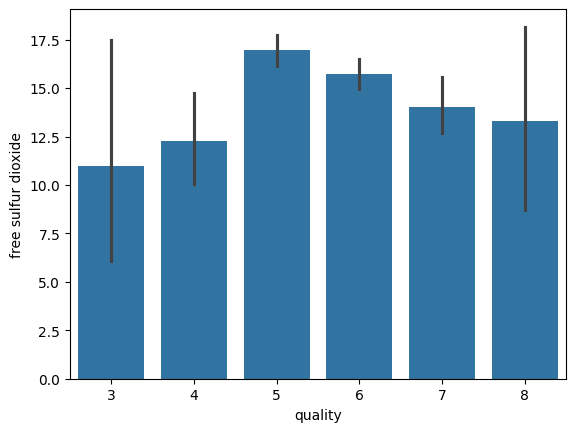

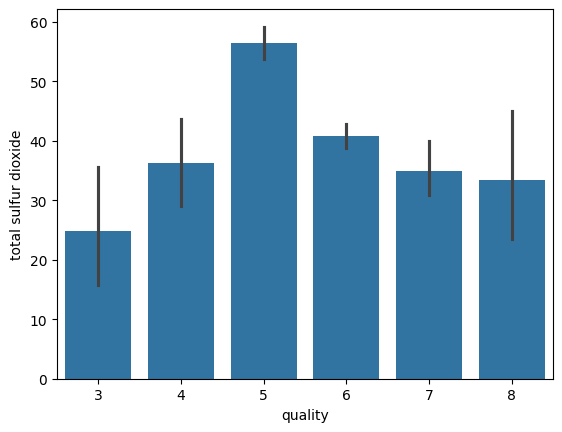

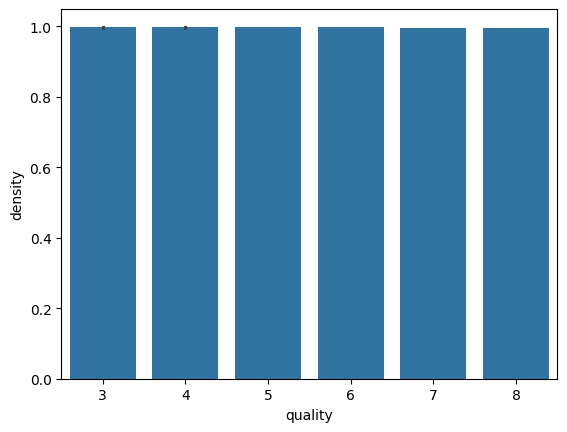

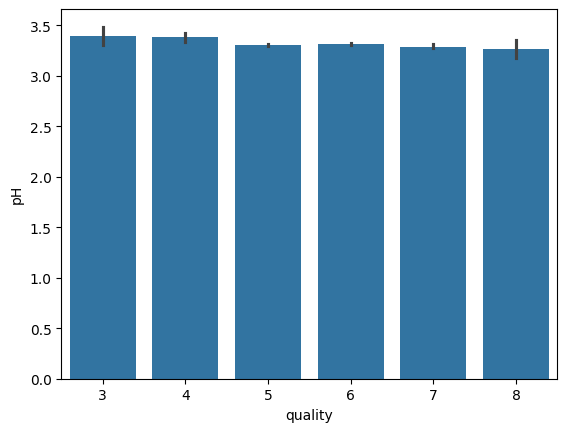

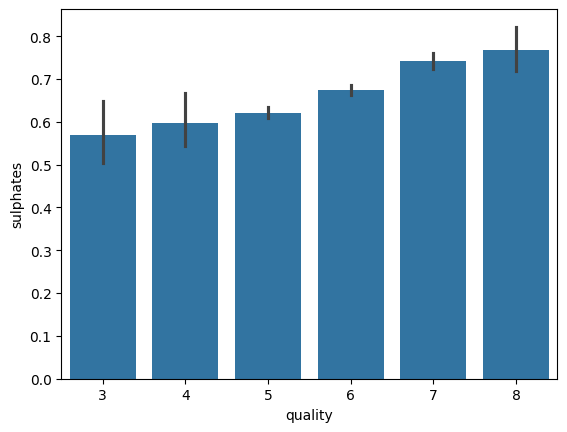

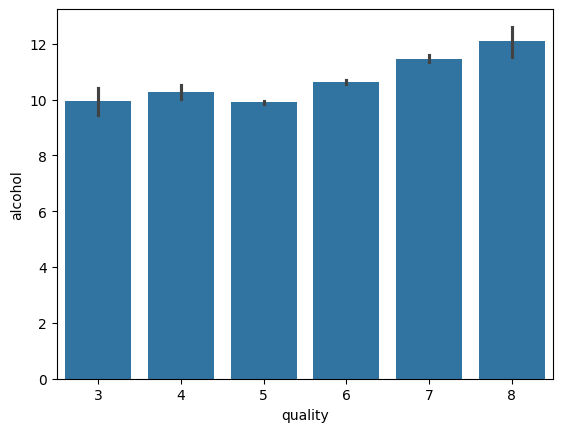

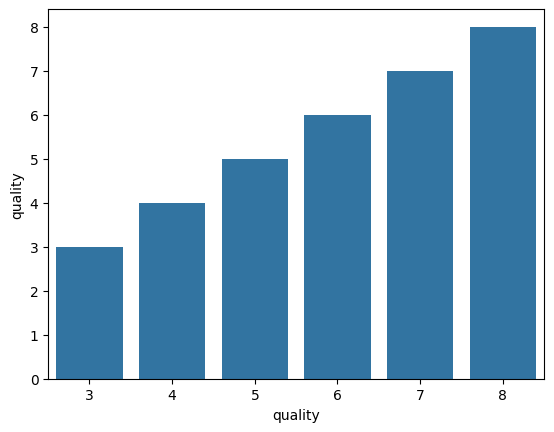

In [4]:
wine.describe()
wine.isnull().sum()
wine['quality'].unique()
sns.countplot(x='quality', data=wine)

# 특성별도 데이터를 시각화 하여 데이터에 대한 정보를 파악합니다
df1 = wine.select_dtypes([int, float])

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.barplot(x='quality', y =col, data=df1)

```
분류 --> 좋으나 나쁘나 2가지중 1개
회귀 --> 집값 연속적인 값 0원 ~ 1억 --> 이중에 얼마인지 예측
회귀 --> 분류 0원 5천만원 --> 집값이 낮다 / 5천 ~ 1억 집값이 높다  --> 분류
```


In [7]:
## 6.5점을 기준으로 좋은 와인과 나쁜 와인을 구분하겠다고 선언
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [8]:
wine.quality


0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['bad' < 'good']

### 라벨 인코딩

In [9]:
## Good/Bad는 인식할 수 없음. 따라서 이를 인식할 수 있도록 Label Encoding을 실시

label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [10]:
wine.quality


0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [11]:
wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [14]:
##종속변수와 독립변수를 나누어주는 작업
x = wine.drop('quality', axis = 1)
y = wine['quality']

## 변수별로 Train과 Test 쓸 데이터 셋을 분류x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


## 측정 지표의 표준화.
# ML 에서 표준화를 시켰을때 예측이 더 잘 되는 경향이 있음
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [15]:
x_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

# 모델들 (accuracy 확인)

## 로지스틱 회귀

In [16]:
## 로지스틱 회귀
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

Accuracy: 0.875
Precision: 0.7058823529411765
Recall: 0.2553191489361702


## SVC

In [17]:
## SVC
model_svc = SVC()
model_svc.fit(x_train, y_train)
y_pred_svc = model_svc.predict(x_test)
print(classification_report(y_test, y_pred_svc))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_svc))
print("Precision:", metrics.precision_score(y_test, y_pred_svc))
print("Recall:", metrics.recall_score(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

Accuracy: 0.875
Precision: 0.7058823529411765
Recall: 0.2553191489361702


In [24]:
## SVC
model_svc = SVC()
model_svc.fit(x_train, y_train)
y_pred_svc = model_svc.predict(x_test)
print(classification_report(y_test, y_pred_svc))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_svc))
print("Precision:", metrics.precision_score(y_test, y_pred_svc))
print("Recall:", metrics.recall_score(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

Accuracy: 0.875
Precision: 0.7058823529411765
Recall: 0.2553191489361702


## KNN

In [19]:
## KNN
model_knn = KNeighborsClassifier(5)
model_knn.fit(x_train, y_train)
y_pred_knn = model_knn.predict(x_test)
print(classification_report(y_test, y_pred_knn))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.61      0.40      0.49        47

    accuracy                           0.88       320
   macro avg       0.76      0.68      0.71       320
weighted avg       0.86      0.88      0.86       320

Accuracy: 0.875
Precision: 0.6129032258064516
Recall: 0.40425531914893614


## NB

In [20]:
## NB
model_NB = GaussianNB()
model_NB.fit(x_train, y_train)
y_pred_NB = model_NB.predict(x_test)
print(classification_report(y_test, y_pred_NB))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_NB))
print("Precision:", metrics.precision_score(y_test, y_pred_NB))
print("Recall:", metrics.recall_score(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       273
           1       0.50      0.74      0.60        47

    accuracy                           0.85       320
   macro avg       0.73      0.81      0.75       320
weighted avg       0.89      0.85      0.86       320

Accuracy: 0.853125
Precision: 0.5
Recall: 0.7446808510638298


## Decision Tree

## 모델 비교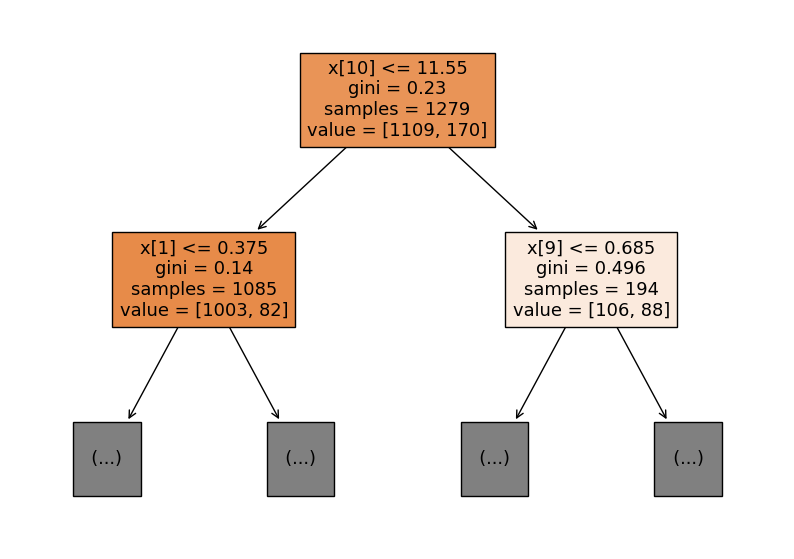

In [21]:
## Decision Tree
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(x_train, y_train)
y_pred_tree = model_tree.predict(x_test)
print(classification_report(y_test, y_pred_tree))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_tree))
print("Precision:", metrics.precision_score(y_test, y_pred_tree))
print("Recall:", metrics.recall_score(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       273
           1       0.49      0.40      0.44        47

    accuracy                           0.85       320
   macro avg       0.69      0.67      0.68       320
weighted avg       0.84      0.85      0.84       320

Accuracy: 0.85
Precision: 0.48717948717948717
Recall: 0.40425531914893614


## RandomForest

In [22]:
## RandomForest
model_rfc = RandomForestClassifier(n_estimators=200)
model_rfc.fit(x_train, y_train)
y_pred_rfc = model_rfc.predict(x_test)
print(classification_report(y_test, y_pred_rfc))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rfc))
print("Precision:", metrics.precision_score(y_test, y_pred_rfc))
print("Recall:", metrics.recall_score(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       273
           1       0.72      0.38      0.50        47

    accuracy                           0.89       320
   macro avg       0.81      0.68      0.72       320
weighted avg       0.88      0.89      0.87       320

Accuracy: 0.8875
Precision: 0.72
Recall: 0.3829787234042553


## Random Forest 가 tree 기반에서 더 좋음

In [23]:
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Support Vector Machine Accuracy:", metrics.accuracy_score(y_test, y_pred_svc))
print("KNN Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Gausian NB Accuracy:", metrics.accuracy_score(y_test, y_pred_NB))
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred_NB))
print("Random Forest Accuracy:", metrics.accuracy_score(y_test, y_pred_rfc))

acc_df = pd.DataFrame({'classifier':
                      ['Logistic Regression ',
                       'Support Vector Machine',
                       'KNN',
                       'Gausian NB',
                       'Decision Tree',
                       'Random Forest'],
                      'accuracy':
                      [metrics.accuracy_score(y_test, y_pred),
                       metrics.accuracy_score(y_test, y_pred_svc),
                       metrics.accuracy_score(y_test, y_pred_knn),
                       metrics.accuracy_score(y_test, y_pred_NB),
                       metrics.accuracy_score(y_test, y_pred_tree),
                       metrics.accuracy_score(y_test, y_pred_rfc),
                       ]
                      })

Logistic Regression Accuracy: 0.875
Support Vector Machine Accuracy: 0.875
KNN Accuracy: 0.875
Gausian NB Accuracy: 0.853125
Decision Tree Accuracy: 0.853125
Random Forest Accuracy: 0.8875


# Tree Decision (분류모델에 더 적합)
* 직관적
* 룰기반 분석에서 설명하기 쉬움
* 지니계수 기반

In [25]:
##종속변수와 독립변수를 나누어주는 작업
x = wine.drop('quality', axis = 1)
y = wine['quality']

## 변수별로 Train과 Test 쓸 데이터 셋을 분류x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 2023)
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

1.0
0.9


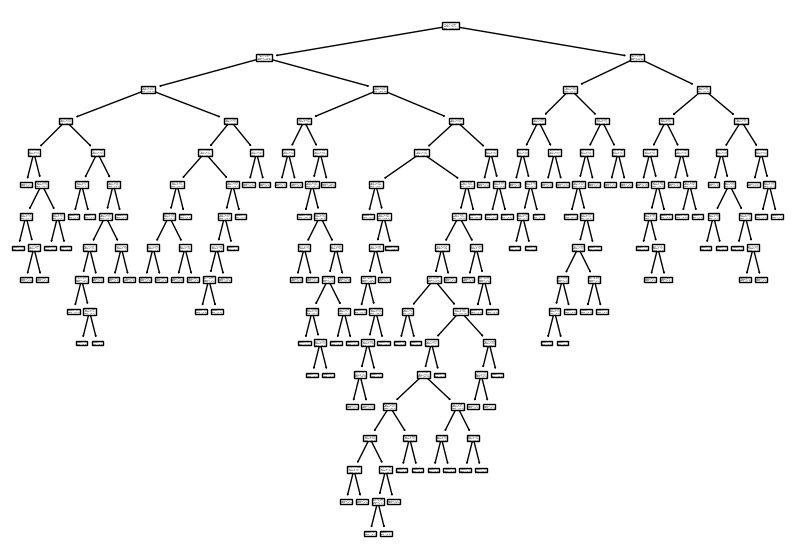

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize =(10,7))
plot_tree(dt)
plt.show()

#

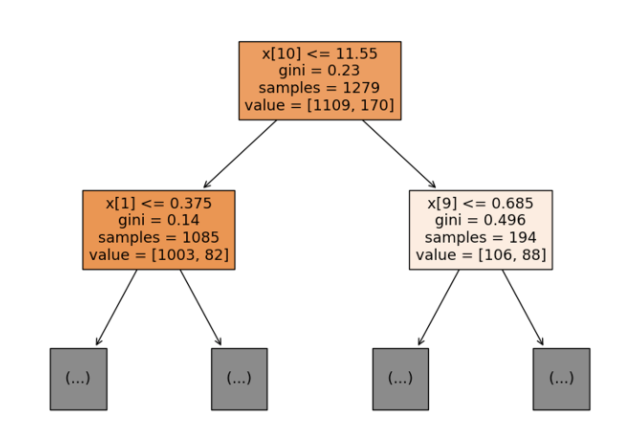

- 조건
- 불순도(gini)
- 총 샘플 수(samples)
- 클래스별 샘플(value)

1. root node: (조건) 알코올 < 11.55 기준
value 1109, 170 기준으로 가름
2. ecisionTreeClassifier의 기본 불순도 구분 값은 gini로 세팅
 : gini는 아까 알코올 11.55에서 나뉘었는데요. 컴퓨터는 어떠한 기준으로 11.55에서 자동으로 나누었을까요?
 * 지니 불순도 = 1 - (타겟이 아닌 클래스 비율의 제곱 + 타겟 클래스 비율의 제곱)


 ```
 | 구분 | 음성 클래스(0)
→ 6.5이하인 나쁜와인 | 양성 클래스(1)
→ 6.5점 이상 좋은 와인 |
| --- | --- | --- |
| 전체 | 1,279 | 1,279 |
| 클래스 갯수 | 1,109 | 170 |
| 클래스/전체 | 86.7% | 13.3% |
| 제곱(위의값의 제곱)| 75.2% | 1.8% |
| 지니계수 (1-(0.752+0.018)) | 23.0% → 0.23 |  |

```
 * 만약 지니 불순도가 0.5 → 50%면 가장 안좋은 케이스이며, 지니 계수가 0에 가까울수록 좋은 케이스입니다.
 --> 한가지 종류가 있다면 지니불순도가 0%
 --> 지니 계수를 낮추는 방향으로 tree 가 뻗어나

## 트리 분석 검증법

1. 각 트리별로 조건을 데이터에 녹여서
그 조건에 해당하는 데이터가 실제로 예측을 잘했는지 살펴본다. (직접적 데이터 확인)
2. 성능 비교. 과적합 아닌지. 성능이 너무 낮지 않은지
3. 예측률: 타겟수, 분류가 적절한지, 데이터, 모델 등의 적합성 확인

## Random Forest (ensemble)

* 랜덤포레스트는 각 트리를 훈련하기 위한 데이터를 랜덤하게 만듬
* 다양한 데이터로 학습할 수 있다
* 작은 변수? 특징들을 모으면 하나의 큰 특징보다 강력하다는 전제

1. **데이터 랜덤**. 중복추출(Bootstrapping): 1000개 3번 돌림. 1번째의 500개와 2번째의 500개는 중복될 수도 있음. 원데이터 1000개와 같은 갯수
train dataset과 동일하게 추출

2. **변수도 랜덤**
전체 특성 개수의 제곱근만큼 특성(변수)를 정하게 됩니다. 변수가 9개면 3개를 선택



### Voting (서로 다른 모델을 voting)
인기있는 모델을 선택

### Bagging
여러 모델을 만들어서 적용. 최종 결정

### Boosting
틀린거에 대해 계속 분석(학습)

### Stacking


# Deep Learning
GPU 활용할 수 있다

## TensorFlow

colab > runtime > GPU 변경 해서 실행

* 0차원 tensor : scalar
* 1차원 vector
* 2차원 matrix
* 3차원이상 3D tensor